#CS231n Python Tutorial With Google Colab

This tutorial was originally written by [Justin Johnson](https://web.eecs.umich.edu/~justincj/) for cs231n. It was adapted as a Jupyter notebook for cs228 by [Volodymyr Kuleshov](http://web.stanford.edu/~kuleshov/) and [Isaac Caswell](https://symsys.stanford.edu/viewing/symsysaffiliate/21335).

This version has been adapted for Colab by Kevin Zakka for the Spring 2020 edition of [cs231n](https://cs231n.github.io/). It runs Python3 by default.

##Introduction

Python is a great general-purpose programming language on its own, but with the help of a few popular libraries (numpy, scipy, matplotlib) it becomes a powerful environment for scientific computing.

We expect that many of you will have some experience with Python and numpy; for the rest of you, this section will serve as a quick crash course both on the Python programming language and on the use of Python for scientific computing.

Some of you may have previous knowledge in Matlab, in which case we also recommend the numpy for Matlab users page (https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html).

In this tutorial, we will cover:

* Basic Python: Basic data types (Containers, Lists, Dictionaries, Sets, Tuples), Functions, Classes
* Numpy: Arrays, Array indexing, Datatypes, Array math, Broadcasting
* Matplotlib: Plotting, Subplots, Images
* IPython: Creating notebooks, Typical workflows

## A Brief Note on Python Versions

As of Janurary 1, 2020, Python has [officially dropped support](https://www.python.org/doc/sunset-python-2/) for `python2`. We'll be using Python 3.7 for this iteration of the course. You can check your Python version at the command line by running `python --version`. In Colab, we can enforce the Python version by clicking `Runtime -> Change Runtime Type` and selecting `python3`. Note that as of April 2020, Colab uses Python 3.6.9 which should run everything without any errors.

In [ ]:
!python --version

Python 3.6.9


##Basics of Python

Python is a high-level, dynamically typed multiparadigm programming language. Python code is often said to be almost like pseudocode, since it allows you to express very powerful ideas in very few lines of code while being very readable. As an example, here is an implementation of the classic quicksort algorithm in Python:

In [1]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

print(quicksort([3,6,8,10,1,2,1]))

[1, 1, 2, 3, 6, 8, 10]


###Basic data types

####Numbers

Integers and floats work as you would expect from other languages:

In [3]:
x = 3
print(x, type(x))

3 <class 'int'>


In [4]:
print(x + 1)   # Addition
print(x - 1)   # Subtraction
print(x * 2)   # Multiplication
print(x ** 2)  # Exponentiation

4
2
6
9


In [ ]:
x += 1
print(x)
x *= 2
print(x)

9
18


In [5]:
y = 2.5
print(type(y))
print(y, y + 1, y * 2, y ** 2)

<class 'float'>
2.5 3.5 5.0 6.25


Note that unlike many languages, Python does not have unary increment (x++) or decrement (x--) operators.

Python also has built-in types for long integers and complex numbers; you can find all of the details in the [documentation](https://docs.python.org/3.7/library/stdtypes.html#numeric-types-int-float-long-complex).

####Booleans

Python implements all of the usual operators for Boolean logic, but uses English words rather than symbols (`&&`, `||`, etc.):

In [6]:
t, f = True, False
print(type(t))

<class 'bool'>


Now we let's look at the operations:

In [8]:
print(t and f) # Logical AND;
print(t or f)  # Logical OR;
print(not t)   # Logical NOT;
print(t != f)  # Logical XOR;

False
True
False
True


####Strings

In [9]:
hello = 'hello'   # String literals can use single quotes
world = "world"   # or double quotes; it does not matter
print(hello, len(hello))

hello 5


In [10]:
hw = hello + ' ' + world  # String concatenation
print(hw)

hello world


In [ ]:
hw12 = '{} {} {}'.format(hello, world, 12)  # string formatting
print(hw12)

hello world 12


String objects have a bunch of useful methods; for example:

In [11]:
s = "hello"
print(s.capitalize())  # Capitalize a string
print(s.upper())       # Convert a string to uppercase; prints "HELLO"
print(s.rjust(7))      # Right-justify a string, padding with spaces
print(s.center(7))     # Center a string, padding with spaces
print(s.replace('l', '(ell)'))  # Replace all instances of one substring with another
print('  world '.strip())  # Strip leading and trailing whitespace

Hello
HELLO
  hello
 hello 
he(ell)(ell)o
world


You can find a list of all string methods in the [documentation](https://docs.python.org/3.7/library/stdtypes.html#string-methods).

###Containers

Python includes several built-in container types: lists, dictionaries, sets, and tuples.

####Lists

A list is the Python equivalent of an array, but is resizeable and can contain elements of different types:

In [12]:
xs = [3, 1, 2]   # Create a list
print(xs, xs[2])
print(xs[-1])     # Negative indices count from the end of the list; prints "2"

[3, 1, 2] 2
2


In [13]:
xs[2] = 'foo'    # Lists can contain elements of different types
print(xs)

[3, 1, 'foo']


In [14]:
xs.append('bar') # Add a new element to the end of the list
print(xs)

[3, 1, 'foo', 'bar']


In [ ]:
x = xs.pop()     # Remove and return the last element of the list
print(x, xs)

bar [3, 1, 'foo']


As usual, you can find all the gory details about lists in the [documentation](https://docs.python.org/3.7/tutorial/datastructures.html#more-on-lists).

####Slicing

In addition to accessing list elements one at a time, Python provides concise syntax to access sublists; this is known as slicing:

In [15]:
nums = list(range(5))    # range is a built-in function that creates a list of integers
print(nums)         # Prints "[0, 1, 2, 3, 4]"
print(nums[2:4])    # Get a slice from index 2 to 4 (exclusive); prints "[2, 3]"
print(nums[2:])     # Get a slice from index 2 to the end; prints "[2, 3, 4]"
print(nums[:2])     # Get a slice from the start to index 2 (exclusive); prints "[0, 1]"
print(nums[:])      # Get a slice of the whole list; prints ["0, 1, 2, 3, 4]"
print(nums[:-1])    # Slice indices can be negative; prints ["0, 1, 2, 3]"
nums[2:4] = [8, 9] # Assign a new sublist to a slice
print(nums)         # Prints "[0, 1, 8, 9, 4]"

[0, 1, 2, 3, 4]
[2, 3]
[2, 3, 4]
[0, 1]
[0, 1, 2, 3, 4]
[0, 1, 2, 3]
[0, 1, 8, 9, 4]


####Loops

You can loop over the elements of a list like this:

In [16]:
animals = ['cat', 'dog', 'monkey']
for animal in animals:
    print(animal)

cat
dog
monkey


If you want access to the index of each element within the body of a loop, use the built-in `enumerate` function:

In [17]:
animals = ['cat', 'dog', 'monkey']
for idx, animal in enumerate(animals):
    print('#{}: {}'.format(idx + 1, animal))

#1: cat
#2: dog
#3: monkey


####List comprehensions:

When programming, frequently we want to transform one type of data into another. As a simple example, consider the following code that computes square numbers:

In [18]:
nums = [0, 1, 2, 3, 4]
squares = []
for x in nums:
    squares.append(x ** 2)
print(squares)

[0, 1, 4, 9, 16]


You can make this code simpler using a list comprehension:

In [ ]:
nums = [0, 1, 2, 3, 4]
squares = [x ** 2 for x in nums]
print(squares)

[0, 1, 4, 9, 16]


List comprehensions can also contain conditions:

In [ ]:
nums = [0, 1, 2, 3, 4]
even_squares = [x ** 2 for x in nums if x % 2 == 0]
print(even_squares)

[0, 4, 16]


####Dictionaries

A dictionary stores (key, value) pairs, similar to a `Map` in Java or an object in Javascript. You can use it like this:

In [21]:
d = {'cat': 'cute', 'dog': 'furry'}  # Create a new dictionary with some data
print(d['cat'])       # Get an entry from a dictionary; prints "cute"
print('cat' in d)     # Check if a dictionary has a given key; prints "True"

cute
True


In [22]:
d['fish'] = 'wet'    # Set an entry in a dictionary
print(d['fish'])      # Prints "wet"

wet


In [23]:
print(d['monkey'])  # KeyError: 'monkey' not a key of d

KeyError: 'monkey'

In [25]:
print(d.get('monkey', 'N/A'))  # Get an element with a default; prints "N/A"
print(d.get('fish', 'N/A'))    # Get an element with a default; prints "wet"

N/A
wet


In [26]:
del d['fish']        # Remove an element from a dictionary
print(d.get('fish', 'N/A')) # "fish" is no longer a key; prints "N/A"

N/A


You can find all you need to know about dictionaries in the [documentation](https://docs.python.org/2/library/stdtypes.html#dict).

It is easy to iterate over the keys in a dictionary:

In [27]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal, legs in d.items():
    print('A {} has {} legs'.format(animal, legs))

A person has 2 legs
A cat has 4 legs
A spider has 8 legs


Dictionary comprehensions: These are similar to list comprehensions, but allow you to easily construct dictionaries. For example:

In [28]:
nums = [0, 1, 2, 3, 4]
even_num_to_square = {x: x ** 2 for x in nums if x % 2 == 0}
print(even_num_to_square)

{0: 0, 2: 4, 4: 16}


####Sets

A set is an unordered collection of distinct elements. As a simple example, consider the following:

In [ ]:
animals = {'cat', 'dog'}
print('cat' in animals)   # Check if an element is in a set; prints "True"
print('fish' in animals)  # prints "False"


True
False


In [ ]:
animals.add('fish')      # Add an element to a set
print('fish' in animals)
print(len(animals))       # Number of elements in a set;

True
3


In [ ]:
animals.add('cat')       # Adding an element that is already in the set does nothing
print(len(animals))
animals.remove('cat')    # Remove an element from a set
print(len(animals))

3
2


_Loops_: Iterating over a set has the same syntax as iterating over a list; however since sets are unordered, you cannot make assumptions about the order in which you visit the elements of the set:

In [ ]:
animals = {'cat', 'dog', 'fish'}
for idx, animal in enumerate(animals):
    print('#{}: {}'.format(idx + 1, animal))

#1: dog
#2: cat
#3: fish


Set comprehensions: Like lists and dictionaries, we can easily construct sets using set comprehensions:

In [ ]:
from math import sqrt
print({int(sqrt(x)) for x in range(30)})

{0, 1, 2, 3, 4, 5}


####Tuples

A tuple is an (immutable) ordered list of values. A tuple is in many ways similar to a list; one of the most important differences is that tuples can be used as keys in dictionaries and as elements of sets, while lists cannot. Here is a trivial example:

In [ ]:
d = {(x, x + 1): x for x in range(10)}  # Create a dictionary with tuple keys
t = (5, 6)       # Create a tuple
print(type(t))
print(d[t])
print(d[(1, 2)])

<class 'tuple'>
5
1


In [30]:
t[0] = 1

TypeError: 'bool' object does not support item assignment

###Functions

Python functions are defined using the `def` keyword. For example:

In [29]:
def sign(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'zero'

for x in [-1, 0, 1]:
    print(sign(x))

negative
zero
positive


We will often define functions to take optional keyword arguments, like this:

In [31]:
def hello(name, loud=False):
    if loud:
        print('HELLO, {}'.format(name.upper()))
    else:
        print('Hello, {}!'.format(name))

hello('Bob')
hello('Fred', loud=True)

Hello, Bob!
HELLO, FRED


###Classes

The syntax for defining classes in Python is straightforward:

In [33]:
class Greeter:

    # Constructor
    def __init__(self, name):
        self.name = name  # Create an instance variable

    # Instance method
    def greet(self, loud=False):
        if loud:
          print('HELLO, {}'.format(self.name.upper()))
        else:
          print('Hello, {}!'.format(self.name))

g = Greeter('Fred')  # Construct an instance of the Greeter class
g.greet()            # Call an instance method; prints "Hello, Fred"
g.greet(loud=True)   # Call an instance method; prints "HELLO, FRED!"

Hello, Fred!
HELLO, FRED


##Numpy

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. If you are already familiar with MATLAB, you might find this [tutorial](http://wiki.scipy.org/NumPy_for_Matlab_Users) useful to get started with Numpy.

To use Numpy, we first need to import the `numpy` package:

In [77]:
import numpy as np

###Arrays

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [78]:
a = np.array([1, 2, 3])  # Create a rank 1 array
print(type(a), a.shape, a[0], a[1], a[2])
a[0] = 5                 # Change an element of the array
print(a)

<class 'numpy.ndarray'> (3,) 1 2 3
[5 2 3]


In [36]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print(b)

[[1 2 3]
 [4 5 6]]


In [37]:
print(b.shape)
print(b[0, 0], b[0, 1], b[1, 0])

(2, 3)
1 2 4


Numpy also provides many functions to create arrays:

In [38]:
a = np.zeros((2,2))  # Create an array of all zeros
print(a)

[[0. 0.]
 [0. 0.]]


In [79]:
b = np.ones((1,2))   # Create an array of all ones
print(b)

[[1. 1.]]


In [40]:
c = np.full((2,2), 7) # Create a constant array
print(c)

[[7 7]
 [7 7]]


In [41]:
d = np.eye(2)        # Create a 2x2 identity matrix
print(d)

[[1. 0.]
 [0. 1.]]


In [42]:
e = np.random.random((2,2)) # Create an array filled with random values
print(e)

[[0.18032929 0.52732212]
 [0.76452987 0.04211047]]


###Array indexing

Numpy offers several ways to index into arrays.

Slicing: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [80]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print(b)

[[2 3]
 [6 7]]


A slice of an array is a view into the same data, so modifying it will modify the original array.

In [81]:
print(a[0, 1])
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])

2
77


You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. Note that this is quite different from the way that MATLAB handles array slicing:

In [82]:
# Create the following rank 2 array with shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Two ways of accessing the data in the middle row of the array.
Mixing integer indexing with slices yields an array of lower rank,
while using only slices yields an array of the same rank as the
original array:

In [83]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
row_r3 = a[[1], :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape)
print(row_r3, row_r3.shape)

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[[5 6 7 8]] (1, 4)


In [84]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)
print()
print(col_r2, col_r2.shape)

[ 2  6 10] (3,)

[[ 2]
 [ 6]
 [10]] (3, 1)


Integer array indexing: When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [85]:
a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and
print(a[[0, 1, 2], [0, 1, 0]])

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))

[1 4 5]
[1 4 5]


In [86]:
# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))

[2 2]
[2 2]


One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [87]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [88]:
# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

[ 1  6  7 11]


In [89]:
# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10
print(a)

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


Boolean array indexing: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [90]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print(bool_idx)

[[False False]
 [ True  True]
 [ True  True]]


In [91]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])

# We can do all of the above in a single concise statement:
print(a[a > 2])

[3 4 5 6]
[3 4 5 6]


For brevity we have left out a lot of details about numpy array indexing; if you want to know more you should read the documentation.

###Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [92]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype

print(x.dtype, y.dtype, z.dtype)

int64 float64 int64


You can read all about numpy datatypes in the [documentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

###Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [56]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [57]:
# Elementwise difference; both produce the array
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [58]:
# Elementwise product; both produce the array
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [59]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [60]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


Note that unlike MATLAB, `*` is elementwise multiplication, not matrix multiplication. We instead use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

In [93]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

219
219


You can also use the `@` operator which is equivalent to numpy's `dot` operator.

In [62]:
print(v @ w)

219


In [63]:
# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))
print(x @ v)

[29 67]
[29 67]
[29 67]


In [64]:
# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))
print(x @ y)

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [65]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


You can find the full list of mathematical functions provided by numpy in the [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the T attribute of an array object:

In [66]:
print(x)
print("transpose\n", x.T)

[[1 2]
 [3 4]]
transpose
 [[1 3]
 [2 4]]


In [67]:
v = np.array([[1,2,3]])
print(v )
print("transpose\n", v.T)

[[1 2 3]]
transpose
 [[1]
 [2]
 [3]]


###Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [94]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


This works; however when the matrix `x` is very large, computing an explicit loop in Python could be slow. Note that adding the vector v to each row of the matrix `x` is equivalent to forming a matrix `vv` by stacking multiple copies of `v` vertically, then performing elementwise summation of `x` and `vv`. We could implement this approach like this:

In [95]:
vv = np.tile(v, (4, 1))  # Stack 4 copies of v on top of each other
print(vv)                # Prints "[[1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]]"

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]


In [96]:
y = x + vv  # Add x and vv elementwise
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy broadcasting allows us to perform this computation without actually creating multiple copies of v. Consider this version, using broadcasting:

In [97]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


The line `y = x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` due to broadcasting; this line works as if v actually had shape `(4, 3)`, where each row was a copy of `v`, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

1. If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
2. The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
3. The arrays can be broadcast together if they are compatible in all dimensions.
4. After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
5. In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension

If this explanation does not make sense, try reading the explanation from the [documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) or this [explanation](http://wiki.scipy.org/EricsBroadcastingDoc).

Functions that support broadcasting are known as universal functions. You can find the list of all universal functions in the [documentation](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

Here are some applications of broadcasting:

In [98]:
# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:

print(np.reshape(v, (3, 1)) * w)

[[ 4  5]
 [ 8 10]
 [12 15]]


In [99]:
# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:

print(x + v)

[[2 4 6]
 [5 7 9]]


In [100]:
# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:

print((x.T + w).T)

[[ 5  6  7]
 [ 9 10 11]]


In [101]:
# Another solution is to reshape w to be a row vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print(x + np.reshape(w, (2, 1)))

[[ 5  6  7]
 [ 9 10 11]]


In [102]:
# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
print(x * 2)

[[ 2  4  6]
 [ 8 10 12]]


Broadcasting typically makes your code more concise and faster, so you should strive to use it where possible.

This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete. Check out the [numpy reference](http://docs.scipy.org/doc/numpy/reference/) to find out much more about numpy.

##Matplotlib

Matplotlib is a plotting library. In this section give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB.

In [ ]:
import matplotlib.pyplot as plt

By running this special iPython command, we will be displaying plots inline:

In [ ]:
%matplotlib inline

###Plotting

The most important function in `matplotlib` is plot, which allows you to plot 2D data. Here is a simple example:

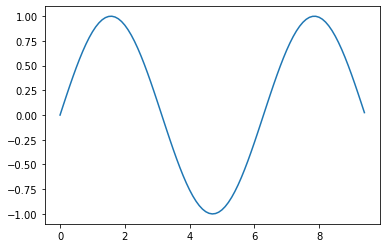

In [ ]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

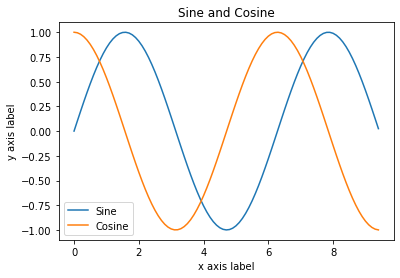

In [ ]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

###Subplots

You can plot different things in the same figure using the subplot function. Here is an example:

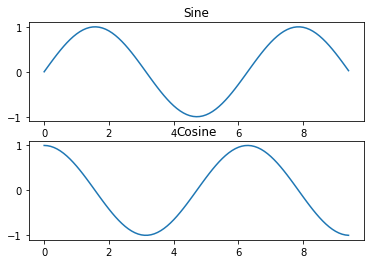

In [ ]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

You can read much more about the `subplot` function in the [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).

In [122]:
import numpy as np
import scipy.stats as stats

# Sample data
data = [23, 45, 56, 78, 12, 89, 90, 45, 67, 34, 23, 56, 45, 67, 78]

# Calculate Mean
mean = np.mean(data)

# Calculate Median
median = np.median(data)

# Calculate Mode
mode = stats.mode(data)

# Calculate Standard Deviation
std_dev = np.std(data)

# Calculate Variance
variance = np.var(data)

# Display the results
print("Descriptive Statistics:")
print("Mean:", mean)
print("Median:", median)
print("Mode:", mode)
print("Standard Deviation:", std_dev)
print("Variance:", variance)

Descriptive Statistics:
Mean: 53.86666666666667
Median: 56.0
Mode: ModeResult(mode=np.int64(45), count=np.int64(3))
Standard Deviation: 23.5905819249029
Variance: 556.5155555555555


In [117]:
# Data Visualisation
pip install matplotlib seaborn pandas

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  
1            70     usa      

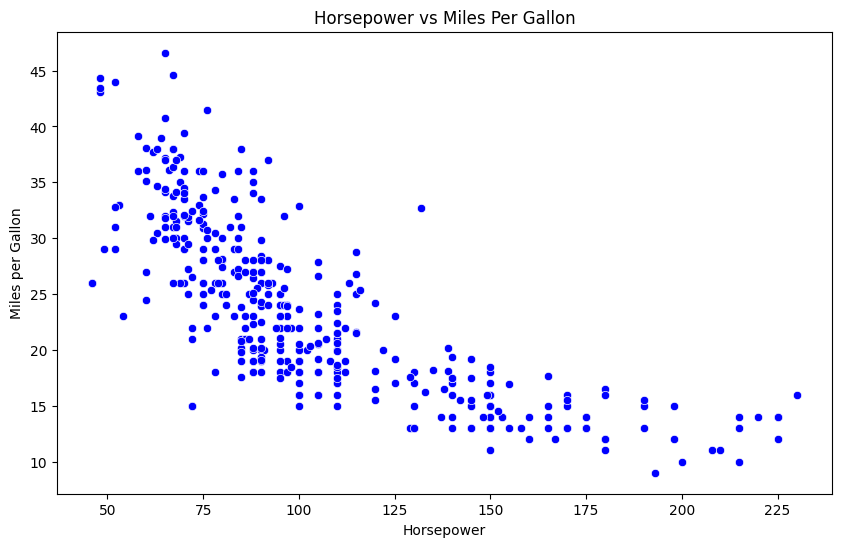

<ipython-input-9-44448684d7e4>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='origin', y='mpg', data=data, palette='Set2')


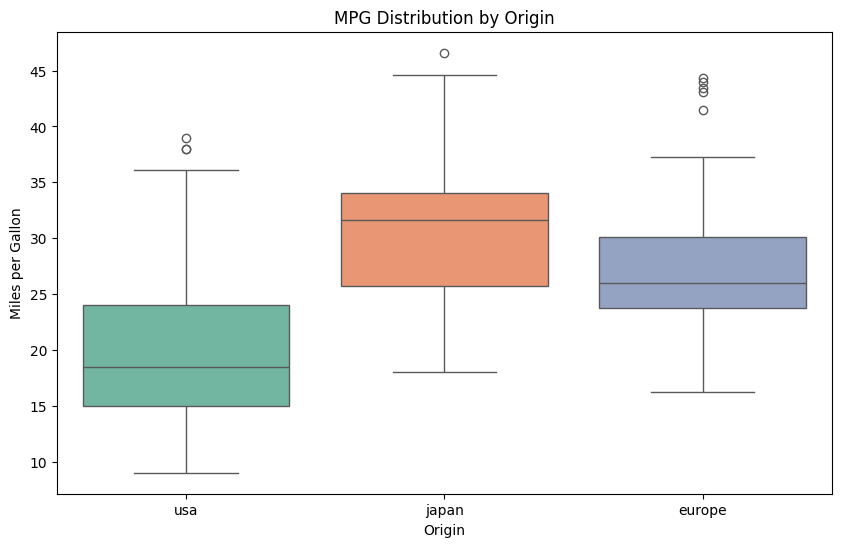

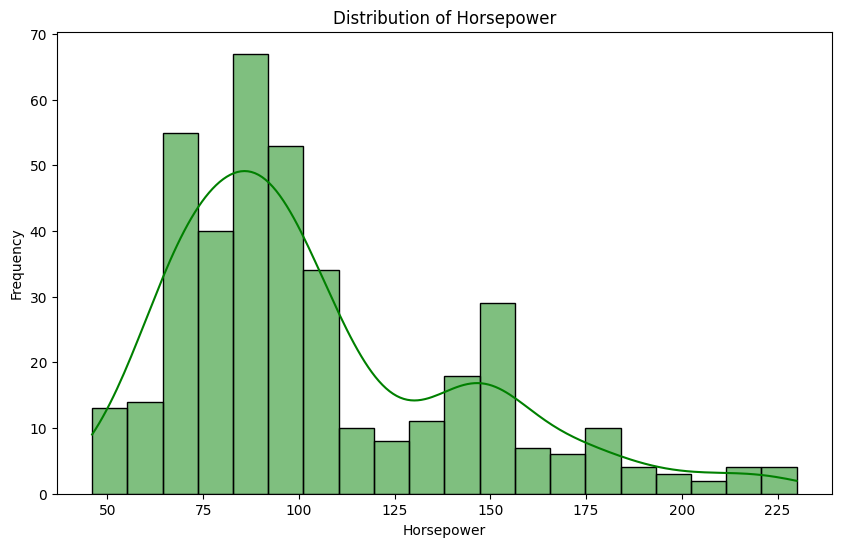

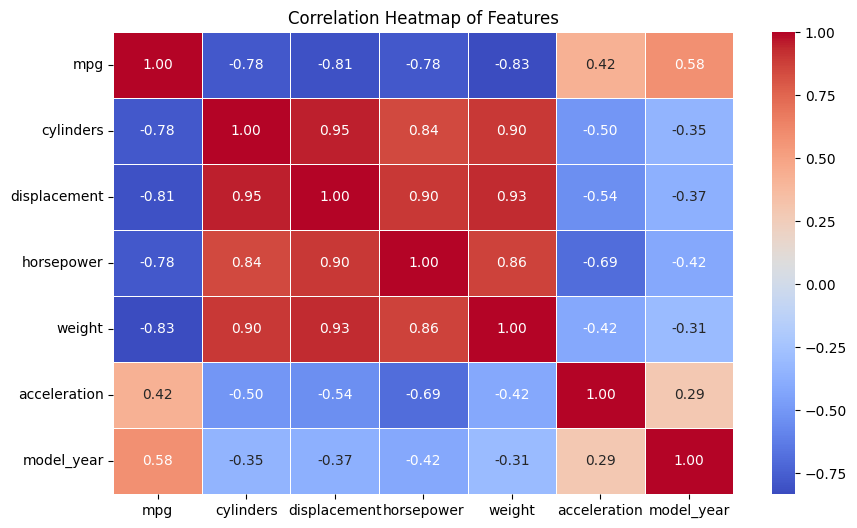

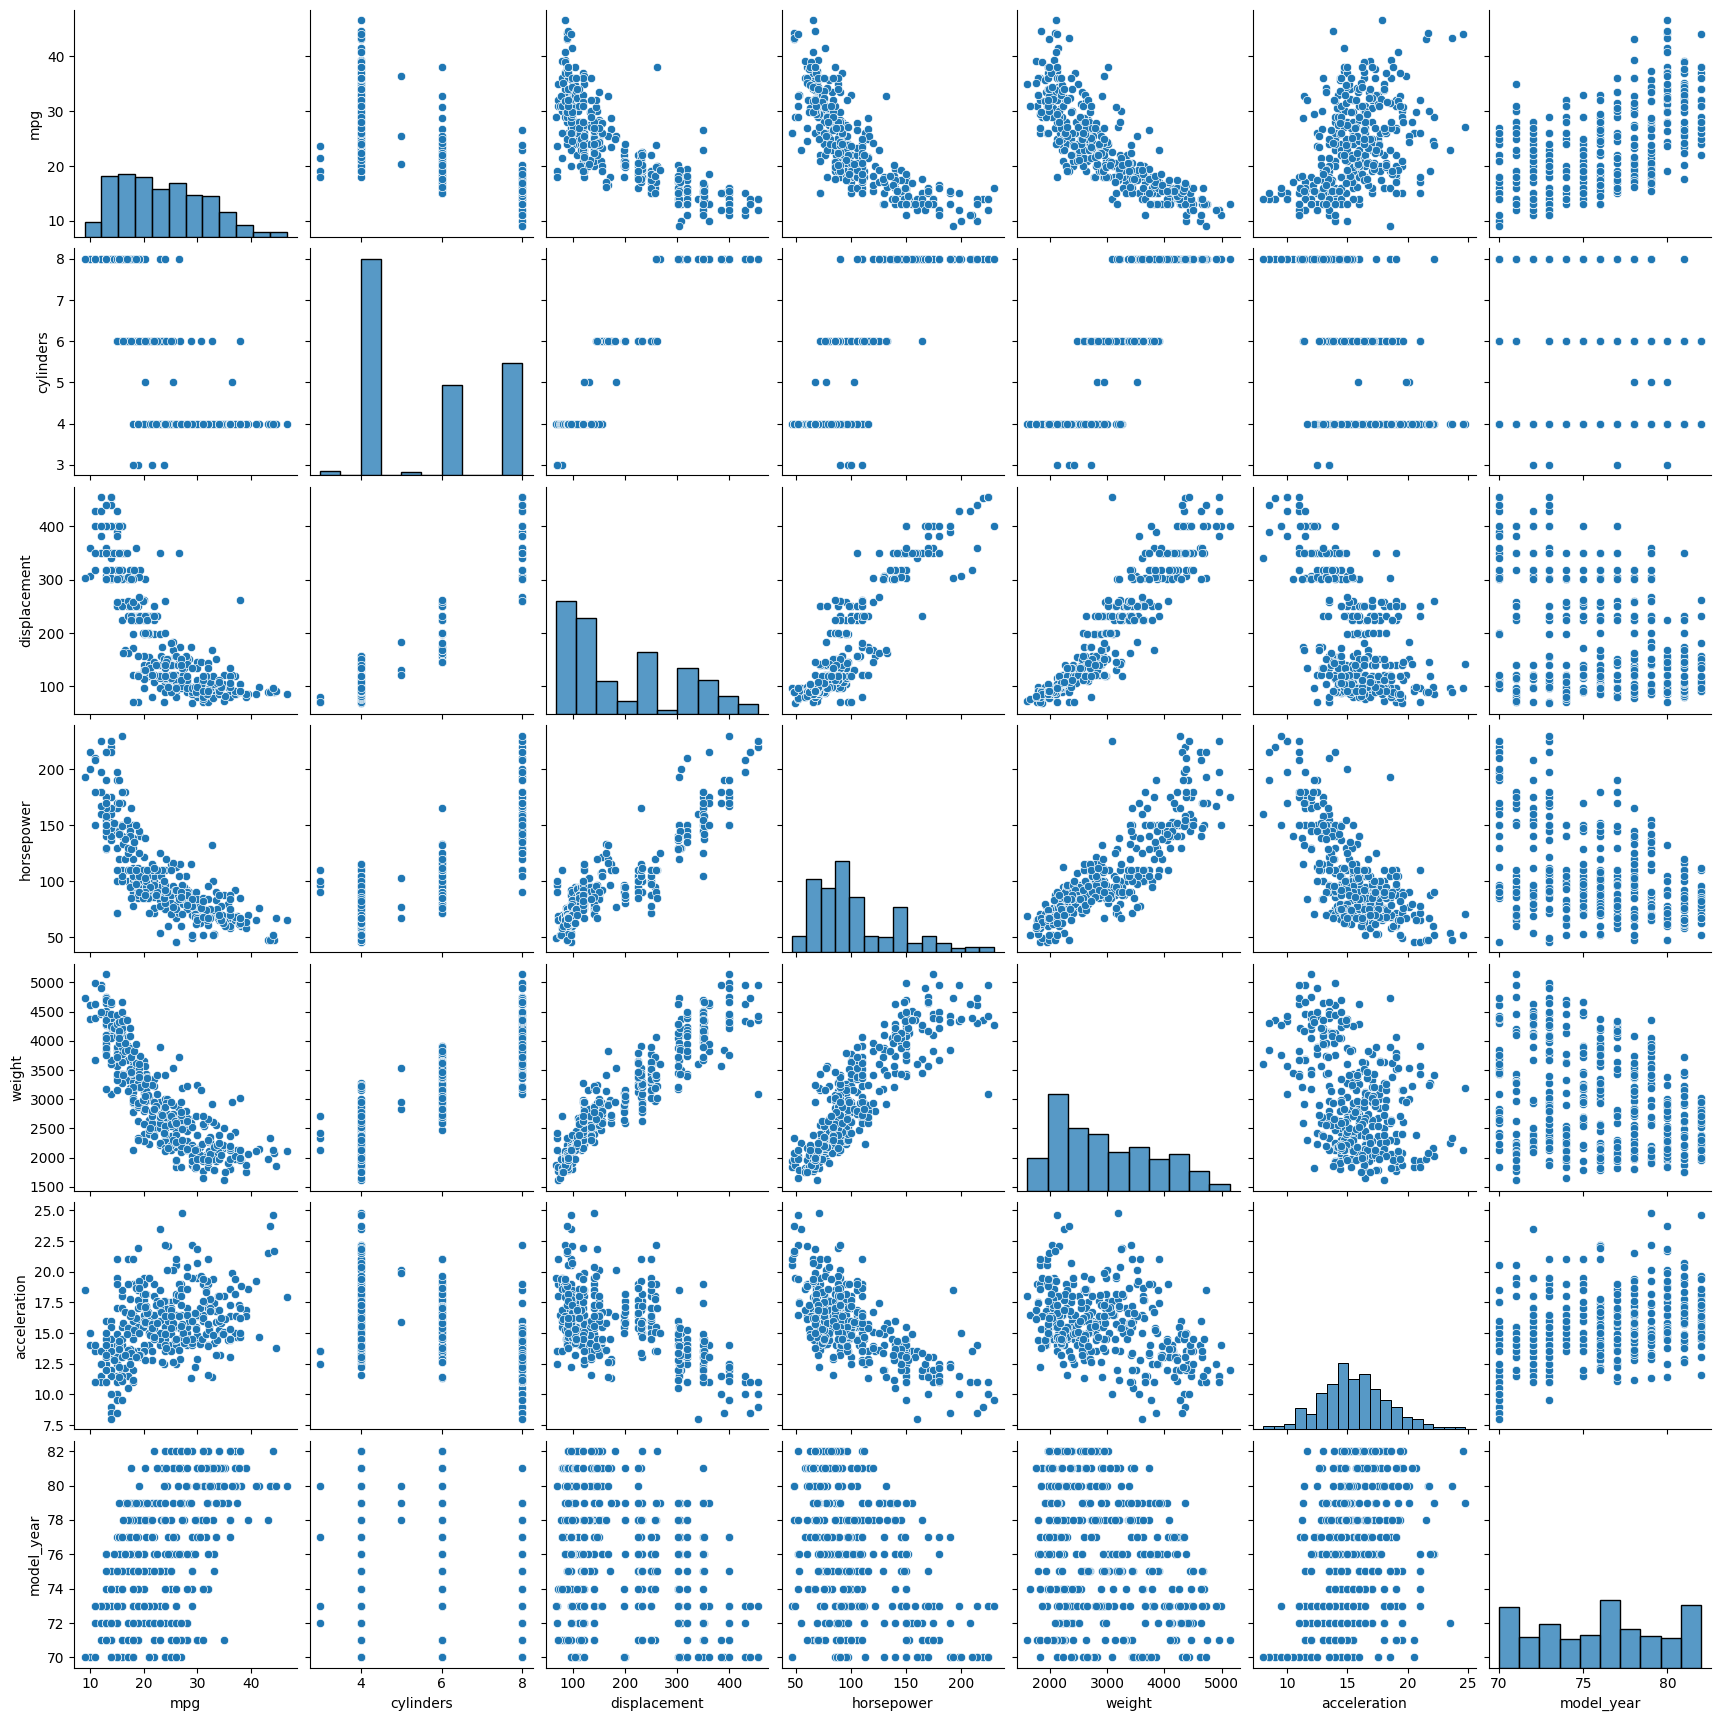

In [9]:
import matplotlib.pyplot as plt # Data Visualisation
import seaborn as sns
import pandas as pd

# Load a sample dataset from seaborn
data = sns.load_dataset('mpg')  # mpg dataset contains car details such as miles per gallon

# Clean the data by dropping rows with missing values
data.dropna(inplace=True)
print(data)

# 1. Scatter Plot - Visualizing horsepower vs. miles per gallon
plt.figure(figsize=(10, 6))
sns.scatterplot(x='horsepower', y='mpg', data=data, color='blue')
plt.title('Horsepower vs Miles Per Gallon')
plt.xlabel('Horsepower')
plt.ylabel('Miles per Gallon')
plt.show()

# 2. Box Plot - Distribution of MPG (Miles Per Gallon) across different origin (USA, Europe, Japan)
plt.figure(figsize=(10, 6))
sns.boxplot(x='origin', y='mpg', data=data, palette='Set2')
plt.title('MPG Distribution by Origin')
plt.xlabel('Origin')
plt.ylabel('Miles per Gallon')
plt.show()

# 3. Histogram - Distribution of Horsepower
plt.figure(figsize=(10, 6))
sns.histplot(data['horsepower'], bins=20, kde=True, color='green')
plt.title('Distribution of Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')
plt.show()

# 4. Correlation Heatmap - Checking correlations between numerical features
x = data.drop(['origin','name'],axis=1)
corr = x.corr()  # Calculate correlation between numeric columns
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

# 5. Pair Plot - Visualize pairwise relationships between numerical features
sns.pairplot(data)
plt.show()

In [10]:
pip install pandas numpy matplotlib scikit-learn

Correlation between Hours Studied and Exam Score: 0.9964517924788718


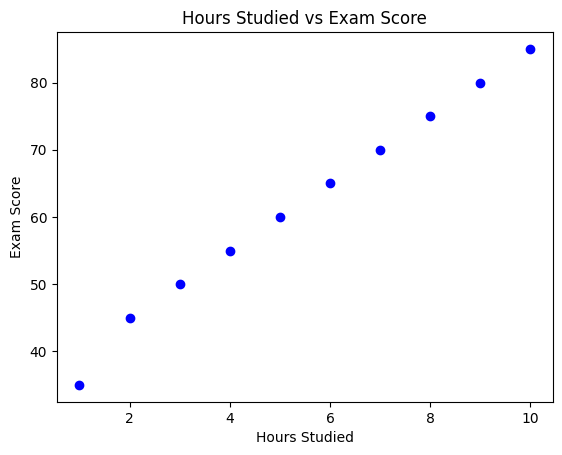

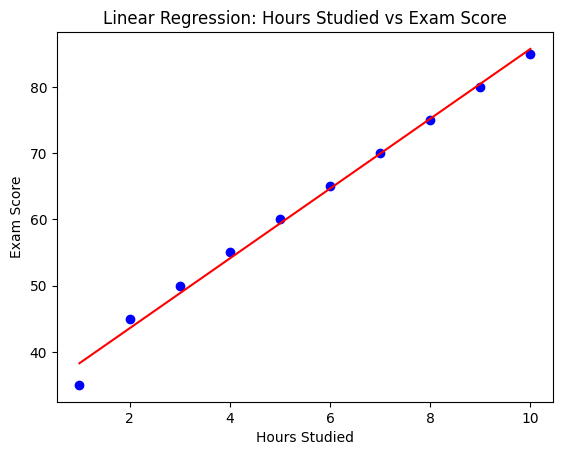

Mean Squared Error: 1.6363636363636374
R-squared: 0.9929161747343566
The regression line equation is: y = 33.00 + 5.27 * x


In [11]:
import numpy as np # Correlation and Regression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Sample data: let's assume we're looking at hours studied vs exam scores
data = {
    'Hours_Studied': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Exam_Score': [35, 45, 50, 55, 60, 65, 70, 75, 80, 85]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Step 1: Calculate the correlation between Hours_Studied and Exam_Score
correlation_matrix = df.corr()
correlation = correlation_matrix.loc['Hours_Studied', 'Exam_Score']
print(f"Correlation between Hours Studied and Exam Score: {correlation}")

# Step 2: Visualize the data with a scatter plot
plt.scatter(df['Hours_Studied'], df['Exam_Score'], color='blue')
plt.title('Hours Studied vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()

# Step 3: Perform Linear Regression
# Reshape the data for linear regression
X = df['Hours_Studied'].values.reshape(-1, 1)  # Independent variable (hours studied)
y = df['Exam_Score'].values  # Dependent variable (exam score)

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Step 4: Predictions
y_pred = model.predict(X)

# Plotting the regression line
plt.scatter(df['Hours_Studied'], df['Exam_Score'], color='blue')  # Original data
plt.plot(df['Hours_Studied'], y_pred, color='red')  # Regression line
plt.title('Linear Regression: Hours Studied vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()

# Step 5: Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# The equation of the regression line
print(f"The regression line equation is: y = {model.intercept_:.2f} + {model.coef_[0]:.2f} * x")

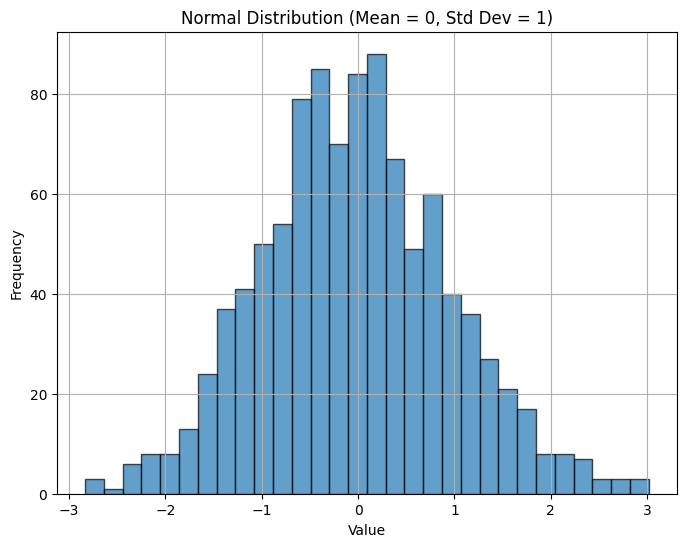

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters for the normal distribution
mean = 0        # Mean of the distribution
std_dev = 1     # Standard deviation of the distribution
size = 1000     # Number of random samples to generate

# Generate random data using numpy (Normal Distribution)
data = np.random.normal(loc=mean, scale=std_dev, size=size)

# Plotting the histogram to visualize the continuous distribution
plt.figure(figsize=(8, 6))
plt.hist(data, bins=30, edgecolor='black', alpha=0.7)
plt.title('Normal Distribution (Mean = 0, Std Dev = 1)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Frequencies of each outcome in 1000 rolls:
Outcome 1: 169 times
Outcome 2: 158 times
Outcome 3: 170 times
Outcome 4: 184 times
Outcome 5: 149 times
Outcome 6: 170 times


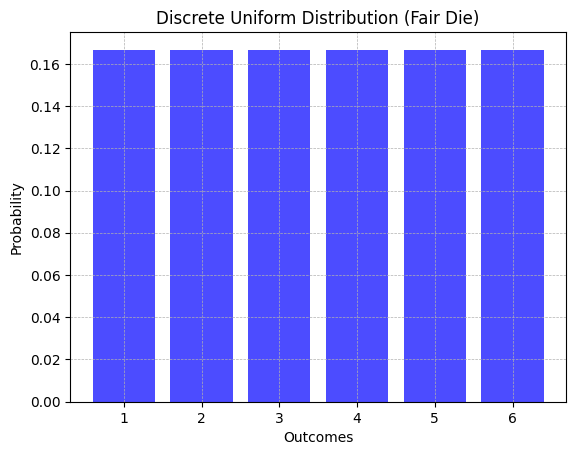

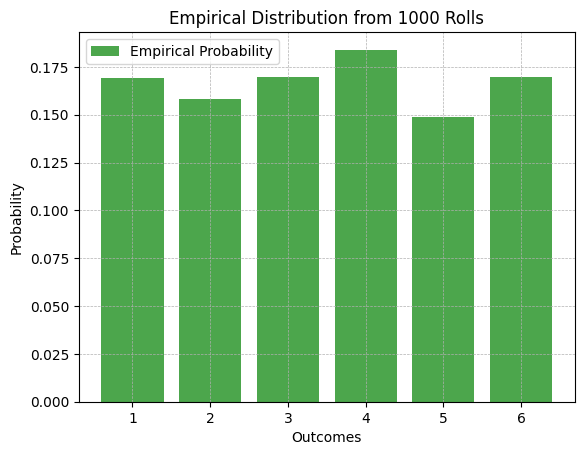

In [13]:
import numpy as np # Discrete Distribution
import matplotlib.pyplot as plt

# Define the outcomes (1 through 6 for a fair die)
outcomes = [1, 2, 3, 4, 5, 6]

# Since the die is fair, each outcome has an equal probability
probabilities = [1/6] * 6  # Equal probability for each outcome (1/6)

# Simulate rolling the die 1000 times
num_rolls = 1000
rolls = np.random.choice(outcomes, size=num_rolls, p=probabilities)

# Calculate frequency of each outcome
frequencies = [np.sum(rolls == outcome) for outcome in outcomes]

# Print frequencies
print(f"Frequencies of each outcome in {num_rolls} rolls:")
for outcome, frequency in zip(outcomes, frequencies):
    print(f"Outcome {outcome}: {frequency} times")

# Plot the discrete probability distribution
plt.bar(outcomes, probabilities, color='blue', alpha=0.7, label='Theoretical Probability')
plt.xlabel('Outcomes')
plt.ylabel('Probability')
plt.title('Discrete Uniform Distribution (Fair Die)')
plt.xticks(outcomes)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# Plot the empirical probability distribution from the simulation
empirical_probabilities = [frequency / num_rolls for frequency in frequencies]
plt.bar(outcomes, empirical_probabilities, color='green', alpha=0.7, label='Empirical Probability')
plt.xlabel('Outcomes')
plt.ylabel('Probability')
plt.title(f'Empirical Distribution from {num_rolls} Rolls')
plt.xticks(outcomes)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


In [14]:
import numpy as np # Hypothetical Testing
from scipy import stats

# Sample data (e.g., test scores of 30 students)
sample_data = np.array([72, 88, 95, 65, 85, 78, 90, 77, 66, 80,
                        74, 93, 67, 85, 91, 87, 79, 84, 83, 70,
                        76, 88, 92, 75, 78, 81, 84, 89, 86, 90])

# Hypothesized population mean (mu_0)
mu_0 = 80

# Perform a one-sample t-test
t_statistic, p_value = stats.ttest_1samp(sample_data, mu_0)

# Print results
print(f"Sample Mean: {np.mean(sample_data)}")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Significance level (alpha) for the hypothesis test
alpha = 0.05

# Interpret the result
if p_value < alpha:
    print(f"Reject the null hypothesis (H0): The sample mean is significantly different from {mu_0}")
else:
    print(f"Fail to reject the null hypothesis (H0): The sample mean is not significantly different from {mu_0}")


Sample Mean: 81.6
T-statistic: 1.0507638648067288
P-value: 0.30204479338449264
Fail to reject the null hypothesis (H0): The sample mean is not significantly different from 80


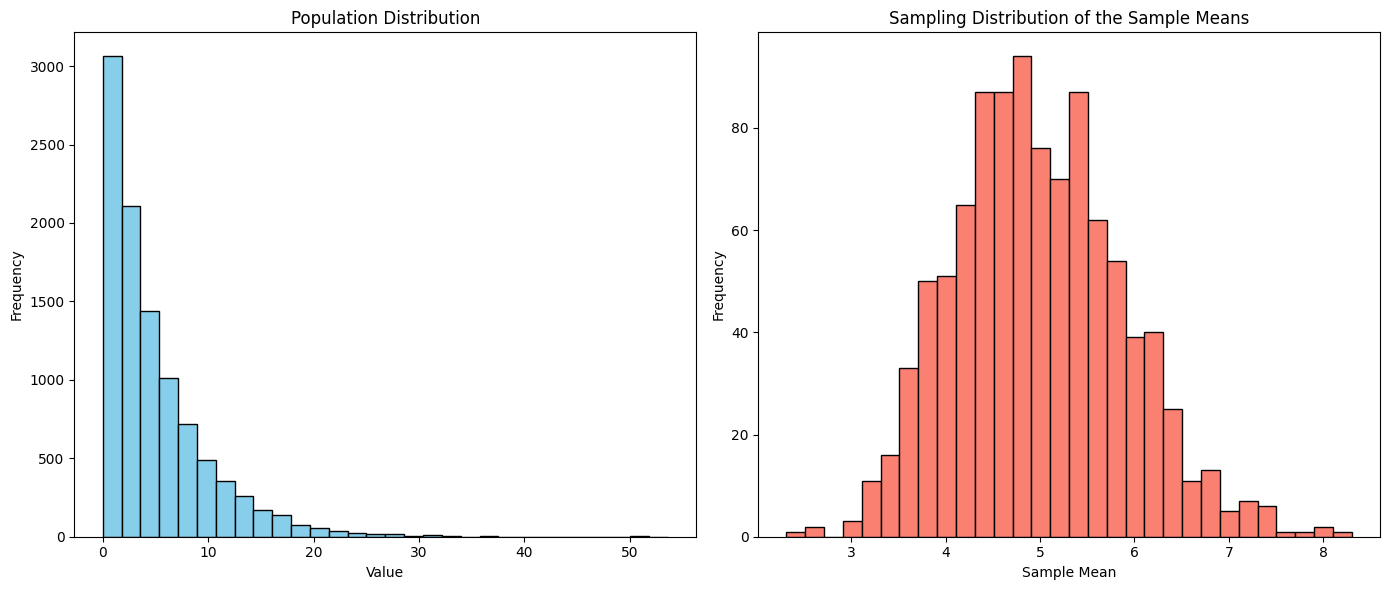

Population Mean:  4.953674935321823
Sample Mean (of sample means):  4.9813976916673655
Population Standard Deviation:  4.999156757162034
Sample Standard Deviation (of sample means):  0.8935240773171372


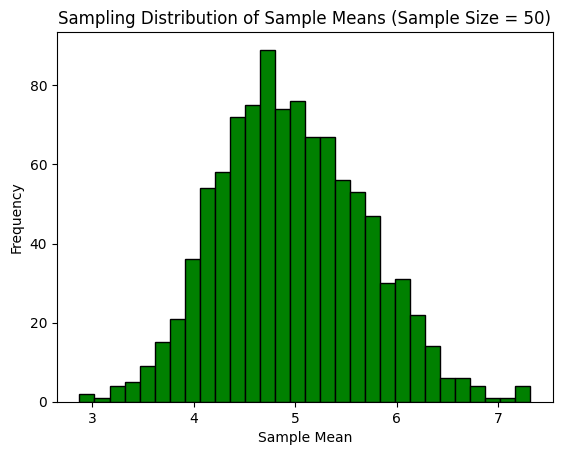

In [15]:
import numpy as np # sampling distributions
import matplotlib.pyplot as plt

# Step 1: Generate a population distribution
np.random.seed(0)  # For reproducibility
population_size = 10000
population = np.random.exponential(scale=5, size=population_size)  # Exponential distribution

# Step 2: Function to take samples from the population
def sample_population(population, sample_size, num_samples):
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(population, size=sample_size, replace=True)
        sample_means.append(np.mean(sample))
    return sample_means

# Step 3: Parameters for sampling
sample_size = 30  # Size of each sample
num_samples = 1000  # Number of samples

# Step 4: Get the sampling distribution of the sample means
sample_means = sample_population(population, sample_size, num_samples)

# Step 5: Plot the population distribution and the sampling distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot population distribution
axes[0].hist(population, bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Population Distribution')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

# Plot sampling distribution of the sample means
axes[1].hist(sample_means, bins=30, color='salmon', edgecolor='black')
axes[1].set_title('Sampling Distribution of the Sample Means')
axes[1].set_xlabel('Sample Mean')
axes[1].set_ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

# Step 6: Display some statistics
population_mean = np.mean(population)
sample_mean = np.mean(sample_means)
population_std = np.std(population)
sample_std = np.std(sample_means)

print("Population Mean: ", population_mean)
print("Sample Mean (of sample means): ", sample_mean)
print("Population Standard Deviation: ", population_std)
print("Sample Standard Deviation (of sample means): ", sample_std)

# Step 7: Show how the sample size affects the distribution
sample_size = 50  # Increase the sample size
sample_means_50 = sample_population(population, sample_size, num_samples)

# Plot the updated sampling distribution
plt.hist(sample_means_50, bins=30, color='green', edgecolor='black')
plt.title('Sampling Distribution of Sample Means (Sample Size = 50)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()


In [16]:
import random # simple random sampling with replacement

# Step 1: Define the population
population = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Example population of 10 elements

# Step 2: Define the sample size
sample_size = 5  # Let's say we want to sample 5 elements

# Step 3: Perform simple random sampling with replacement
sample = random.choices(population, k=sample_size)

# Step 4: Output the results
print(f"Population: {population}")
print(f"Sample (with replacement): {sample}")


Population: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Sample (with replacement): [9, 2, 9, 6, 4]


In [18]:
import random # simple random sampling without replacement

def simple_random_sampling(population, sample_size):
    """
    Function to perform Simple Random Sampling Without Replacement (SRSWOR).

    Args:
    population (list): The list of items to sample from.
    sample_size (int): The number of items to sample.

    Returns:
    list: A randomly selected sample of the given size from the population.
    """
    # Check if sample size is larger than the population size
    if sample_size > len(population):
        raise ValueError("Sample size cannot be larger than the population size.")

    # Use random.sample() to select unique items (without replacement)
    sample = random.sample(population, sample_size)

    return sample

# Example usage:
if __name__ == "__main__":
    # Define a population (e.g., a list of numbers representing people, items, etc.)
    population = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

    # Set the sample size (number of items to select)
    sample_size = 3

    # Perform Simple Random Sampling Without Replacement
    try:
        sample = simple_random_sampling(population, sample_size)
        print("Randomly selected sample:", sample)
    except ValueError as e:
        print(e)


Randomly selected sample: [5, 7, 6]
